In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
import seaborn as sns
sns.set_style('whitegrid')
from keras.models import  Sequential,load_model
from keras.layers import LSTM,Dense,Dropout

In [2]:
import os
df = pd.read_csv('gold-daily-price.csv')

In [3]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,03/01/1975,174.70,173.0,175.5,170.50,0,-0.23%
1,06/01/1975,174.40,172.0,174.5,167.50,0,-0.17%
2,07/01/1975,173.40,171.0,174.0,168.50,0,-0.57%
3,08/01/1975,177.40,176.0,180.0,176.00,0,2.31%
4,09/01/1975,178.30,179.0,179.1,177.00,0,0.51%
...,...,...,...,...,...,...,...
12262,11/05/2023,2020.50,2036.8,2047.6,2016.70,296.98K,-0.81%
12263,12/05/2023,2019.80,2020.5,2027.8,2005.70,220.50K,-0.03%
12264,15/05/2023,2022.70,2013.4,2027.5,2011.20,163.25K,0.14%
12265,16/05/2023,1993.00,2021.3,2022.7,1989.10,229.94K,-1.47%


In [4]:
df = df['Open'].values

In [5]:
df

array([ 173. ,  172. ,  171. , ..., 2013.4, 2021.3, 1993.7])

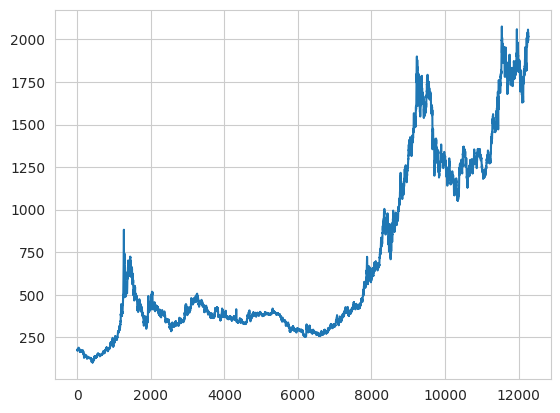

In [6]:
plt.plot(df)

In [7]:
df.shape

(12267,)

In [8]:
df = df.reshape(-1,1)
df.shape

(12267, 1)

In [9]:
df

array([[ 173. ],
       [ 172. ],
       [ 171. ],
       ...,
       [2013.4],
       [2021.3],
       [1993.7]])

In [10]:
#to calculate 80% training data
12267*0.8

9813.6

In [11]:
12267-9813

2454

In [12]:
dataset_train = np.array(df[0:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-60:])

In [13]:
dataset_train.shape

(9813, 1)

In [14]:
dataset_test.shape

(2514, 1)

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [16]:
dataset_train

array([[0.03948393],
       [0.03892782],
       [0.03837171],
       ...,
       [0.6469247 ],
       [0.6558781 ],
       [0.6588811 ]])

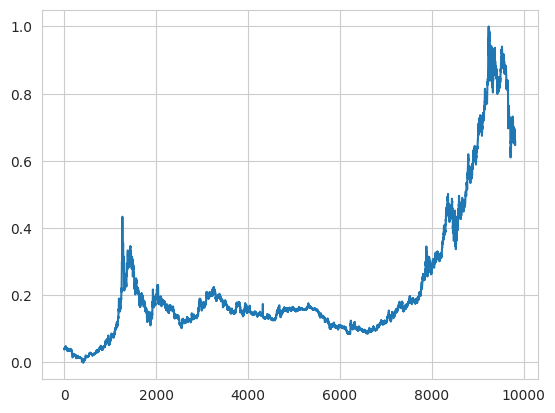

In [17]:
plt.plot(dataset_train)

In [18]:
#60 timestep
def create_dataset(df):
  x = []
  y = []
  for i in range(60,df.shape[0]):
    x.append(df[i-60:i,0])
    y.append(df[i,0])
  x = np.array(x)
  y = np.array(y)
  return x,y

In [19]:
x_train, y_train = create_dataset(dataset_train)

In [20]:
x_train.shape

(9753, 60)

In [21]:
y_train.shape

(9753,)

In [22]:
x_test,y_test = create_dataset(dataset_test)

In [23]:
x_test.shape

(2454, 60)

In [24]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(2454, 60, 1)

In [26]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [27]:
x_train.shape

(9753, 60, 1)

In [28]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

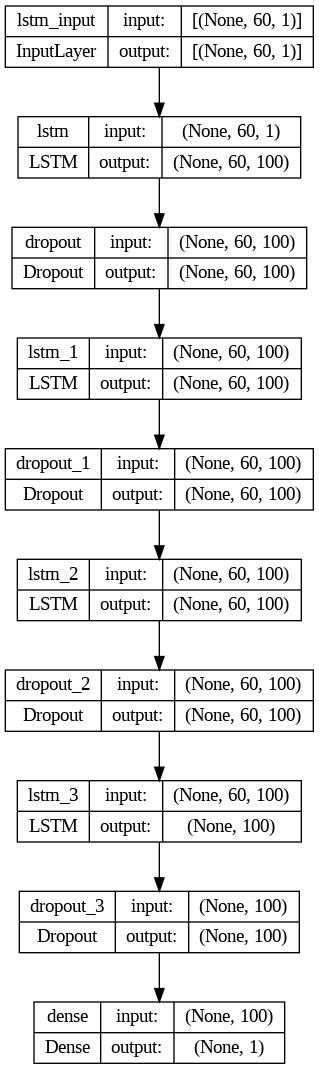

In [29]:
import tensorflow as tf
tf.keras.utils.plot_model(model,show_shapes=True)

In [30]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.fit(x_train,y_train,epochs=40,batch_size=32)

Epoch 1/40
305/305 [==============================] - 19s 18ms/step - loss: 0.0020
Epoch 2/40
305/305 [==============================] - 5s 16ms/step - loss: 9.5502e-04
Epoch 3/40
305/305 [==============================] - 5s 16ms/step - loss: 6.6667e-04
Epoch 4/40
305/305 [==============================] - 6s 18ms/step - loss: 6.0744e-04
Epoch 5/40
305/305 [==============================] - 5s 15ms/step - loss: 6.3750e-04
Epoch 6/40
305/305 [==============================] - 5s 17ms/step - loss: 6.7484e-04
Epoch 7/40
305/305 [==============================] - 5s 16ms/step - loss: 5.0143e-04
Epoch 8/40
305/305 [==============================] - 5s 15ms/step - loss: 4.9932e-04
Epoch 9/40
305/305 [==============================] - 6s 18ms/step - loss: 4.0125e-04
Epoch 10/40
305/305 [==============================] - 6s 20ms/step - loss: 4.0413e-04
Epoch 11/40
305/305 [==============================] - 6s 19ms/step - loss: 4.3539e-04
Epoch 12/40
305/305 [==============================] - 

In [32]:
predictions = model.predict(x_test)
predictions

77/77 [==============================] - 2s 7ms/step


array([[0.6607315 ],
       [0.6624174 ],
       [0.6616818 ],
       ...,
       [0.9468839 ],
       [0.94704765],
       [0.9467231 ]], dtype=float32)

In [33]:
y_test

array([0.66004894, 0.65231899, 0.65204093, ..., 1.06295184, 1.06734512,
       1.05199644])

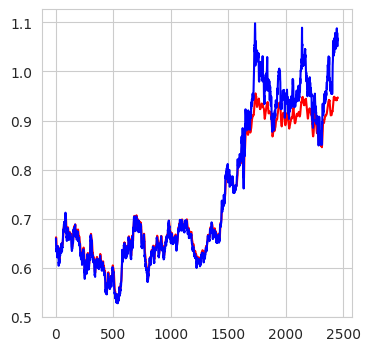

In [34]:
plt.figure(figsize=(4,4))
plt.plot(predictions,color='red')
plt.plot(y_test,color='blue')
plt.show()